In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import joblib


In [3]:
data = load_breast_cancer()
X = data.data
y = data.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


In [7]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

comparison_df = pd.DataFrame(results)
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1        Decision Tree  0.947368   0.957746  0.957746  0.957746
2        Random Forest  0.964912   0.958904  0.985915  0.972222
3                  SVM  0.982456   0.972603  1.000000  0.986111


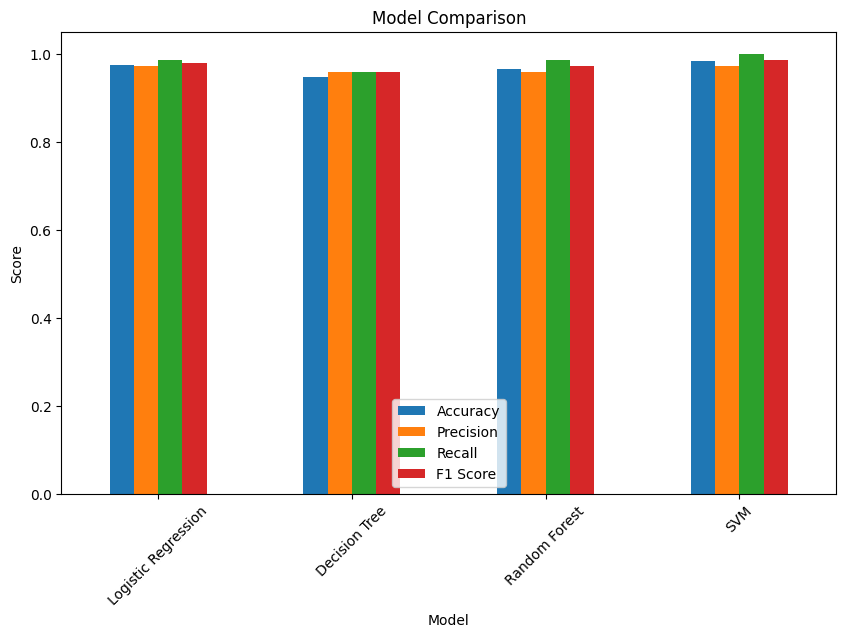

In [8]:
comparison_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [9]:
best_model_name = comparison_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
print("Best Model:", best_model_name)


Best Model: SVM


In [10]:
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

In [11]:
comparison_df.to_csv("model_comparison_table.csv", index=False)


In [12]:
plt.savefig("model_comparison_plot.png")


<Figure size 640x480 with 0 Axes>

In [1]:
from google.colab import  files
files.upload()

Saving Breast_Cancer.csv to Breast_Cancer.csv


{'Breast_Cancer.csv': b'Age,Race,Marital Status,T Stage ,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status\r\n68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive\r\n50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive\r\n58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive\r\n58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive\r\n47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive\r\n51,White,Single ,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive\r\n51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive\r\n40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive